### DISCLAIMER
### Na estatística, viés, pressuposições erradas e pressa nos levam a conclusões erradas!

In [1]:
%cd /media/andre/LxData/tse-2022/csvs/turno2/

/media/andre/LxData/tse-2022/csvs/turno2


In [2]:
import pandas as pd 
from pathlib import Path 
from matplotlib import pyplot as plt 
import seaborn as sns 
from tqdm import tqdm
import numpy as np
sns.set_theme()
%matplotlib inline 

### Sample testing file
#### Selecting usefull columns

In [3]:
votos = pd.read_csv('bweb_2t_AC_311020221535.csv', encoding='cp1252', sep=';')
votos.head(1)
selected = """DS_ELEICAO SG_UF NM_MUNICIPIO NR_ZONA	NR_SECAO	NR_LOCAL_VOTACAO DS_CARGO_PERGUNTA NR_PARTIDO SG_PARTIDO QT_APTOS QT_COMPARECIMENTO QT_ABSTENCOES CD_TIPO_URNA NR_VOTAVEL NM_VOTAVEL QT_VOTOS NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA""".replace('\t', ' ').split(" ")
votos[selected].head(5)

DS_ELEICAO SG_UF NM_MUNICIPIO  NR_ZONA  NR_SECAO  \
0  Eleição Geral Federal 2022    AC   RIO BRANCO        1         3   
1  Eleição Geral Federal 2022    AC   RIO BRANCO        1         3   
2  Eleição Geral Federal 2022    AC   RIO BRANCO        1         3   
3  Eleição Geral Federal 2022    AC   RIO BRANCO        1         3   
4  Eleição Geral Federal 2022    AC   RIO BRANCO        1         4   

   NR_LOCAL_VOTACAO DS_CARGO_PERGUNTA  NR_PARTIDO SG_PARTIDO  QT_APTOS  \
0              1279        Presidente          13         PT       185   
1              1279        Presidente          -1     #NULO#       185   
2              1279        Presidente          22         PL       185   
3              1279        Presidente          -1     #NULO#       185   
4              1139        Presidente          22         PL       339   

   QT_COMPARECIMENTO  QT_ABSTENCOES  CD_TIPO_URNA  NR_VOTAVEL      NM_VOTAVEL  \
0                147             38             1          13            LULA   
1                147             38             1          96            Nulo   
2                147             38             1          22  JAIR BOLSONARO   
3                147             38             1          95          Branco   
4                259             80             1          22  JAIR BOLSONARO   

   QT_VOTOS  NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA  
0        48            2046404                    90FF9DFC  
1         1            2046404                    90FF9DFC  
2        96            2046404                    90FF9DFC  
3         2            2046404                    90FF9DFC  
4       167            2048249                    90FF9DFC

### Merging all *csvs boletins de urnas (only selected columns)

In [4]:
csvs = []
for path in Path('.').glob('*.csv'):
    data = pd.read_csv(path.absolute(), encoding='cp1252', sep=';')    
    csvs.append(data[selected])
    print(str(path.absolute()))

/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_SC_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_MA_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_PB_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_ES_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_DF_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_GO_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_AP_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_PE_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_RO_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_ZZ_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_RN_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_PA_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_PI_311020221535.csv
/media/andre/LxData/tse-2022/csvs/turno2/bweb_2t_AC_311020221535.csv
/media/andre/LxData/tse-2022/csvs/

In [5]:
csvs_todos = pd.concat(csvs, axis=0, ignore_index=True)
print(len(csvs_todos))

2841231


### Criando coluna modelo de urna pela coluna NR_URNA_EFETIVADA e tabela abaixo

    2009	999500	1220500
    2010	1220501	1345500
    2011	1368501	1370500
    2011	1600000	1650000
    2013	1650001	1701000
    2015	1750000	1950000 
    2020	2000000	2250000


In [6]:
def label(x):
    if x == 1:
        return 2009
    if x == 2:
        return 2010 
    if x == 3 or x == 4:
        return 2011
    if x == 5:
        return 2013
    if x == 6:
        return 2015
    if x == 7:
        return 2020 
    else:
        return np.nan 

import numpy as np 
csvs_todos['MODELO'] = np.digitize(csvs_todos.NR_URNA_EFETIVADA,bins=[999500,1220500,1345500,1370500,1650000,1701000,1950000,2250000], right=True).astype(int) # 1 is 2009, 2 is 2010 and so on
csvs_todos['MODELO'] = csvs_todos['MODELO'].apply(label)

In [7]:
csvs_todos[csvs_todos['MODELO'].isnull()]

DS_ELEICAO SG_UF    NM_MUNICIPIO  NR_ZONA  NR_SECAO  \
626605  Eleição Geral Federal 2022    ZZ  CIUDAD GUAYANA        1        91   

        NR_LOCAL_VOTACAO DS_CARGO_PERGUNTA  NR_PARTIDO SG_PARTIDO  QT_APTOS  \
626605              1015        Presidente          -1     #NULO#        75   

        QT_COMPARECIMENTO  QT_ABSTENCOES  CD_TIPO_URNA  NR_VOTAVEL NM_VOTAVEL  \
626605                  0             75             4          96       Nulo   

        QT_VOTOS  NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA  MODELO  
626605         0                 -1                      #NULO#     NaN

In [8]:
csvs_todos.dropna(inplace=True) # ignore above 0 votos 

### Distribuição de boletins de urna por modelo de Urna

<AxesSubplot:>

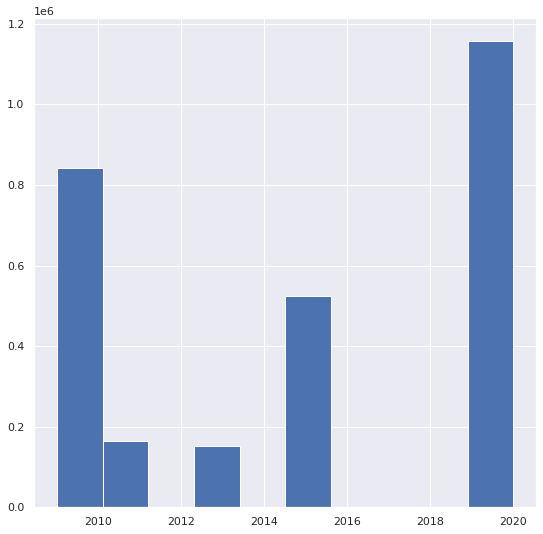

In [9]:
# modelos de urnas 
plt.figure(figsize=(9,9))
csvs_todos.MODELO.hist(bins=10)

In [10]:
csvs_todos.columns

Index(['DS_ELEICAO', 'SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_LOCAL_VOTACAO', 'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO',
       'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES', 'CD_TIPO_URNA',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'MODELO'],
      dtype='object')

In [11]:
#csvs_todos.to_csv("/media/andre/LxData/tse-2022/csvs/turno2_todos_csvs.csv", index=False)
csvs_todos = pd.read_csv('/media/andre/LxData/tse-2022/csvs/turno2_todos_csvs.csv')

In [12]:
csvs_todos.head()

DS_ELEICAO SG_UF NM_MUNICIPIO  NR_ZONA  NR_SECAO  \
0      Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
1      Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
2      Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
3      Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
4  Eleições Gerais Estaduais 2022    SC    ARARANGUÁ        1         1   

   NR_LOCAL_VOTACAO DS_CARGO_PERGUNTA  NR_PARTIDO SG_PARTIDO  QT_APTOS  \
0              1015        Presidente          -1     #NULO#       391   
1              1015        Presidente          22         PL       391   
2              1015        Presidente          -1     #NULO#       391   
3              1015        Presidente          13         PT       391   
4              1015        Governador          -1     #NULO#       391   

   QT_COMPARECIMENTO  QT_ABSTENCOES  CD_TIPO_URNA  NR_VOTAVEL      NM_VOTAVEL  \
0                318             73             1          95          Branco   
1                318             73             1          22  JAIR BOLSONARO   
2                318             73             1          96            Nulo   
3                318             73             1          13            LULA   
4                318             73             1          96            Nulo   

   QT_VOTOS  NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA  MODELO  
0         2            1282596                    009A2C50  2010.0  
1       221            1282596                    009A2C50  2010.0  
2         2            1282596                    009A2C50  2010.0  
3        93            1282596                    009A2C50  2010.0  
4         4            1282596                    009A2C50  2010.0

## Consolida urnas por UF, MUNICIPIO e MODELO (PRESIDENTE)

Cria novo dataframe com cada row correspondendo à 1 urna:  
Votos Lula, bolsonaro, cidade, uf, modelo de urna

In [65]:
csvs_todos

DS_ELEICAO SG_UF NM_MUNICIPIO  NR_ZONA  NR_SECAO  \
0            Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
1            Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
2            Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
3            Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
4        Eleições Gerais Estaduais 2022    SC    ARARANGUÁ        1         1   
...                                 ...   ...          ...      ...       ...   
2841225      Eleição Geral Federal 2022    PR      SARANDI      206       223   
2841226      Eleição Geral Federal 2022    PR      SARANDI      206       224   
2841227      Eleição Geral Federal 2022    PR      SARANDI      206       224   
2841228      Eleição Geral Federal 2022    PR      SARANDI      206       224   
2841229      Eleição Geral Federal 2022    PR      SARANDI      206       224   

         NR_LOCAL_VOTACAO DS_CARGO_PERGUNTA  NR_PARTIDO SG_PARTIDO  QT_APTOS  \
0                    1015        Presidente          -1     #NULO#       391   
1                    1015        Presidente          22         PL       391   
2                    1015        Presidente          -1     #NULO#       391   
3                    1015        Presidente          13         PT       391   
4                    1015        Governador          -1     #NULO#       391   
...                   ...               ...         ...        ...       ...   
2841225              1252        Presidente          -1     #NULO#       441   
2841226              1210        Presidente          -1     #NULO#       349   
2841227              1210        Presidente          -1     #NULO#       349   
2841228              1210        Presidente          22         PL       349   
2841229              1210        Presidente          13         PT       349   

         ...  QT_ABSTENCOES  CD_TIPO_URNA  NR_VOTAVEL      NM_VOTAVEL  \
0        ...             73             1          95          Branco   
1        ...             73             1          22  JAIR BOLSONARO   
2        ...             73             1          96            Nulo   
3        ...             73             1          13            LULA   
4        ...             73             1          96            Nulo   
...      ...            ...           ...         ...             ...   
2841225  ...            131             1          96            Nulo   
2841226  ...            116             1          95          Branco   
2841227  ...            116             1          96            Nulo   
2841228  ...            116             1          22  JAIR BOLSONARO   
2841229  ...            116             1          13            LULA   

        QT_VOTOS  NR_URNA_EFETIVADA  CD_FLASHCARD_URNA_EFETIVADA  MODELO  \
0              2            1282596                     009A2C50  2010.0   
1            221            1282596                     009A2C50  2010.0   
2              2            1282596                     009A2C50  2010.0   
3             93            1282596                     009A2C50  2010.0   
4              4            1282596                     009A2C50  2010.0   
...          ...                ...                          ...     ...   
2841225        6            1097838                     F48D887E  2009.0   
2841226        3            1112044                     F48D887E  2009.0   
2841227        3            1112044                     F48D887E  2009.0   
2841228       93            1112044                     F48D887E  2009.0   
2841229      134            1112044                     F48D887E  2009.0   

         BOLSONARO   LULA  
0              NaN    NaN  
1            221.0    NaN  
2              NaN    NaN  
3              NaN   93.0  
4              NaN    NaN  
...            ...    ...  
2841225        NaN    NaN  
2841226        NaN    NaN  
2841227        NaN    NaN  
2841228       93.0    NaN

In [61]:
%%time 
## fastest way in pandas
votos_bolsonaro = csvs_todos.loc[csvs_todos.NR_VOTAVEL == 22]
votos_lula = csvs_todos.loc[csvs_todos.NR_VOTAVEL == 13]
# votos_brancos = csvs_todos.loc[csvs_todos.NM_VOTAVEL == 'Branco']
# votos_nulos = csvs_todos.loc[csvs_todos.NM_VOTAVEL == 'Nulo']
csvs_todos.loc[votos_bolsonaro.index,'BOLSONARO'] = votos_bolsonaro.QT_VOTOS.astype(int)
csvs_todos.loc[votos_lula.index,'LULA'] = votos_lula.QT_VOTOS.astype(int)
votos_presidente = csvs_todos.query("DS_CARGO_PERGUNTA == 'Presidente'").copy()
votos_presidente.dropna(thresh=len(csvs_todos.columns)-1, inplace=True) # drop Brancos Nulos
# drop useless columns for bellow
votos_presidente.drop(columns=['DS_ELEICAO','NR_VOTAVEL', 'NM_VOTAVEL', 'NR_PARTIDO', 'SG_PARTIDO', 'DS_CARGO_PERGUNTA', 'QT_VOTOS'], inplace=True)
votos_presidente.head()

CPU times: user 2.97 s, sys: 1.49 s, total: 4.46 s
Wall time: 4.47 s


DS_ELEICAO SG_UF NM_MUNICIPIO  NR_ZONA  NR_SECAO  \
1   Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
3   Eleição Geral Federal 2022    SC    ARARANGUÁ        1         1   
8   Eleição Geral Federal 2022    SC    ARARANGUÁ        1         2   
11  Eleição Geral Federal 2022    SC    ARARANGUÁ        1         2   
16  Eleição Geral Federal 2022    SC    ARARANGUÁ        1         3   

    NR_LOCAL_VOTACAO  QT_APTOS  QT_COMPARECIMENTO  QT_ABSTENCOES  \
1               1015       391                318             73   
3               1015       391                318             73   
8               1015       393                315             78   
11              1015       393                315             78   
16              1015       390                326             64   

    CD_TIPO_URNA  NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA  MODELO  \
1              1            1282596                    009A2C50  2010.0   
3              1            1282596                    009A2C50  2010.0   
8              1            1824228                    009A2C50  2015.0   
11             1            1824228                    009A2C50  2015.0   
16             1            1847115                    009A2C50  2015.0   

    BOLSONARO   LULA  
1       221.0    NaN  
3         NaN   93.0  
8       207.0    NaN  
11        NaN  104.0  
16      211.0    NaN

In [62]:
urnas_presidente = [] 
for name, udf in tqdm(votos_presidente.groupby(['SG_UF', 'NM_MUNICIPIO', 'NR_URNA_EFETIVADA'])):    
        BL = udf.loc[:, ['BOLSONARO', 'LULA']].max().tolist()
        urnas_presidente.append(udf.iloc[0, :-2].tolist() + BL)

100%|██████████| 472022/472022 [09:54<00:00, 794.15it/s] 


In [73]:
urnas_presidente = pd.DataFrame(urnas_presidente, columns=votos_presidente.columns)
urnas_presidente.loc[:, 'VOTANTES'] = urnas_presidente.LULA + urnas_presidente.BOLSONARO
urnas_presidente.head()

DS_ELEICAO SG_UF NM_MUNICIPIO  NR_ZONA  NR_SECAO  \
0  Eleição Geral Federal 2022    AC   ACRELÂNDIA        8        94   
1  Eleição Geral Federal 2022    AC   ACRELÂNDIA        8       215   
2  Eleição Geral Federal 2022    AC   ACRELÂNDIA        8       102   
3  Eleição Geral Federal 2022    AC   ACRELÂNDIA        8        84   
4  Eleição Geral Federal 2022    AC   ACRELÂNDIA        8       117   

   NR_LOCAL_VOTACAO  QT_APTOS  QT_COMPARECIMENTO  QT_ABSTENCOES  CD_TIPO_URNA  \
0              1066       195                154             41             1   
1              1139       265                189             76             1   
2              1040       180                143             37             1   
3              1023       223                162             61             1   
4              1210       223                161             62             1   

   NR_URNA_EFETIVADA CD_FLASHCARD_URNA_EFETIVADA  MODELO  BOLSONARO  LULA  \
0            1005701                    1DD6178A  2009.0      114.0  37.0   
1            1013311                    15F7E34D  2009.0      153.0  33.0   
2            1013601                    1DD6178A  2009.0       96.0  45.0   
3            1013942                    1DD6178A  2009.0      126.0  32.0   
4            1023550                    1DD6178A  2009.0      124.0  32.0   

   VOTANTES  
0     151.0  
1     186.0  
2     141.0  
3     158.0  
4     156.0

In [3]:
#urnas_presidente.to_csv('/media/andre/LxData/tse-2022/csvs/turno2_urnas_presidente.csv', index=False)                        
urnas_presidente = pd.read_csv('/media/andre/LxData/tse-2022/csvs/turno2_urnas_presidente.csv')                        

## Urnas consolidadas em candidato e discriminando modelo

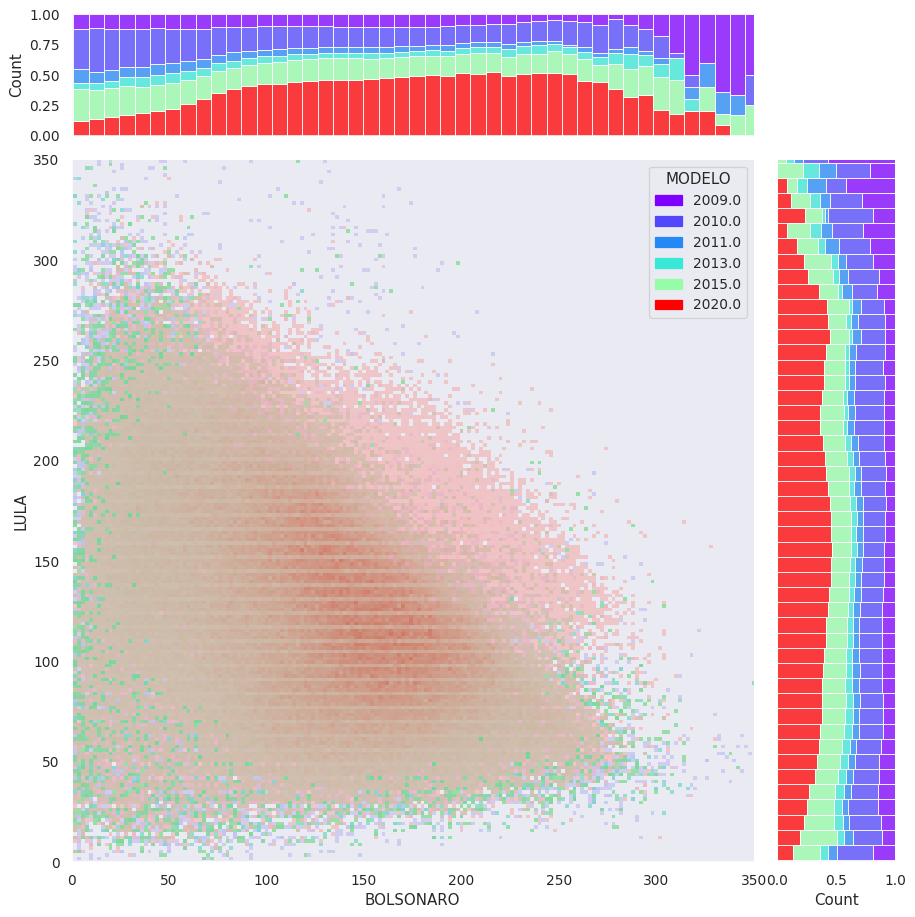

In [4]:
sns.set_style("dark")
# urnas_presidente.query("urna == 2020")
g = sns.jointplot(data=urnas_presidente, x="BOLSONARO", y="LULA", hue="MODELO", alpha=0.7, kind='hist',
                  xlim=(0,350), ylim=(0,350), palette='rainbow', 
                  marginal_kws=dict(bins=70, fill=True, palette='rainbow', multiple='fill'), marginal_ticks=True)
g.fig.set_dpi(90)
g.fig.set_size_inches(11,11)

count    4.495810e+05
mean     6.847030e+05
std      1.675619e+06
min      5.000000e+00
25%      1.495500e+04
50%      5.811200e+04
75%      2.812650e+05
max      6.869405e+06
Name: city_votantes, dtype: float64


<AxesSubplot:>

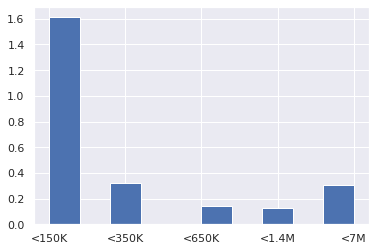

In [5]:
def func(x):
    urnas_presidente.loc[x.index, 'city_votantes'] = sum(x.LULA+x.BOLSONARO)    
urnas_presidente.groupby(['SG_UF', 'NM_MUNICIPIO'], sort=False).apply(func)
urnas_presidente['city_lbl'] = pd.cut(urnas_presidente.city_votantes, bins=[0,150e3,350e3,650e3,140e4,7e6], 
                                           labels=['<150K', '<350K', 
                                                   '<650K', '<1.4M', '<7M'])
print(urnas_presidente.city_votantes.describe())
urnas_presidente['city_lbl'].hist(density=True)

## Northeast cities with less than 100,000 voters

#### Lista de cidades por população de votantes

cuttoff 100K 

In [18]:
small_cities = urnas_presidente.groupby(urnas_presidente.NM_MUNICIPIO).agg({"VOTANTES" : "sum"}).query("VOTANTES < 100e3").index.to_list()

##### Pega somente cidades que tenham urnas 2020 AND alguma das outras != 2020

In [19]:
ufs_northeast = """MA PI CE RN PB PE AL SE BA""".split(' ')
urnas_presidente_neast = urnas_presidente.query("NM_MUNICIPIO == @small_cities and SG_UF == @ufs_northeast")
def coexistent(x):
    return 2020 in x.values and x.nunique() > 1
urnas_presidente_neast.groupby(['SG_UF','NM_MUNICIPIO']).agg({'MODELO' : coexistent }).query("MODELO == True")

MODELO
SG_UF NM_MUNICIPIO                
MA    CAXIAS                  True
      CHAPADINHA              True
      COLINAS                 True
      PINHEIRO                True
      SANTA INÊS              True
      SANTA LUZIA DO PARUÁ    True

### Somente as 6 cidades do Maranhão acima atendem esses critérios

In [20]:
cities_neast_ma = urnas_presidente_neast.groupby(['SG_UF','NM_MUNICIPIO']).agg({'MODELO' : coexistent }).query("MODELO == True").index.to_list()
urnas_presidente_ma = urnas_presidente_neast.loc[urnas_presidente.loc[:, ['SG_UF', 'NM_MUNICIPIO']].apply(tuple, axis=1).isin(cities_neast_ma)]

In [6]:
#gaussian pdf fit
from scipy.stats import norm
import numpy as np 

def plot_pdf(mean, std, color='k'):
    xmin, xmax = plt.xlim()
    mu, std = mean, std
    x = np.linspace(10, 120, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color=color, linewidth=1)
    return mu, std 

mean 75.00 std 10.812
mean 70.87 std 9.007


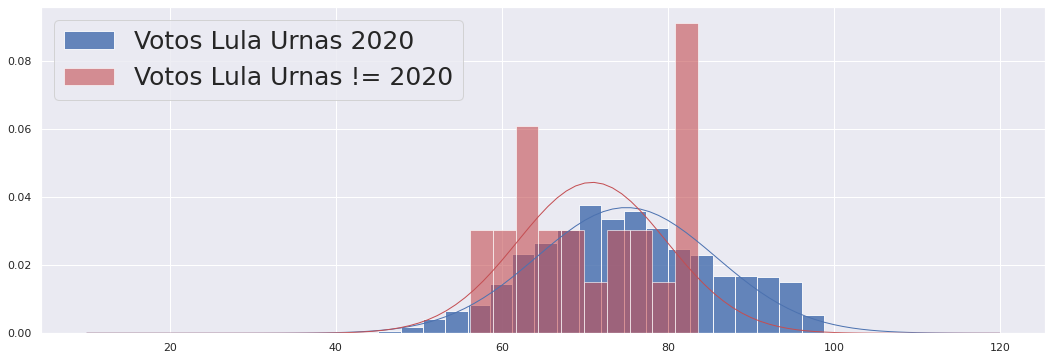

In [22]:
plt.figure(figsize=(18,6))
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('legend', fontsize=25)    # fontsize of the x and y labels
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
perc_lula = 100*urnas_presidente_ma.query('MODELO == 2020').LULA/urnas_presidente_ma.query('MODELO == 2020').VOTANTES
perc_lula.hist(bins=20, alpha=0.85, label='Votos Lula Urnas 2020', density=True)
mu, std = plot_pdf(perc_lula.mean(), perc_lula.std(), 'b')
print(f"mean {mu:.2f} std {std:.3f}")
perc_lula = 100*urnas_presidente_ma.query('MODELO != 2020').LULA/urnas_presidente_ma.query('MODELO != 2020').VOTANTES
perc_lula.hist(bins=10, color='r', alpha=0.6, label='Votos Lula Urnas != 2020', density=True)
mu, std  = plot_pdf(perc_lula.mean(), perc_lula.std(), 'r')
print(f"mean {mu:.2f} std {std:.3f}")
plt.legend()

## O ERRO!

### Se pagarmos urnas de cidades do nordeste misturando modelos de cidades diferentes

Ou seja, cidades que só tem 1 ou mais modelo de urna 2013, 2015 etc todos diferentes de 2020 ou qualquer combinação delas.   
E toda as que só tem urnas 2020. 

Isso viola o pressuposto estatístico que é que cada cidade tem uma distribuição estatística específica.  
Por exemplo, simplificando. Acabamos comparando urnas do modelo 2020 da cidade A com urnas de modelos 2013, 1015 etc. da cidade B.  
Como cidade A e cidade B são ambientes eleitorais diferentes não se pode afirmar que suas urnas devem apresentar mesma distribuição estatística.  

Exemplo mais detalhado. Na prática nesse gráfico são comparadas urnas das cidades A, B, C etc. modelo 2020 com urnas das cidades E, F, G, H, I etc... com outros modelos.  
Mas as distribuições das cidades A, B, C, D, E, F, G, H, I são inerentemente diferentes entre si.  
Só poderiam ser comparadas urnas 2020 de A com urnas != 2020 em A. Urnas 2020 de B com urnas != 2020 de B. E assim sucessivamente.  

mean 70.24 std 12.095
mean 76.01 std 11.478


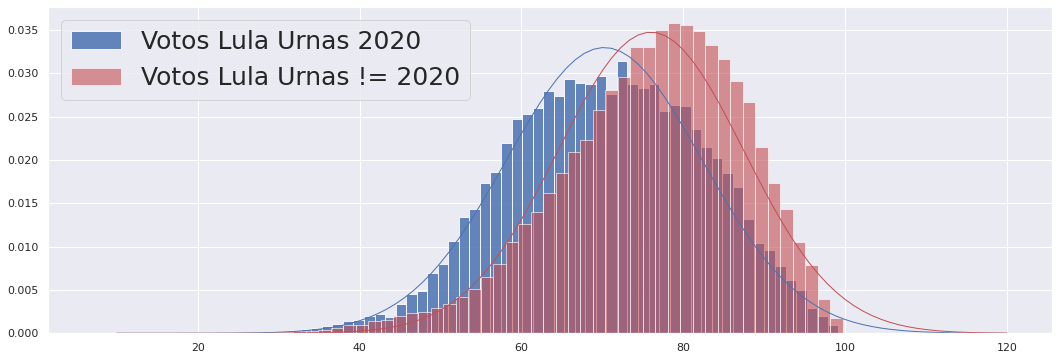

In [23]:
plt.figure(figsize=(18,6))
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('legend', fontsize=25)    # fontsize of the x and y labels
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
perc_lula = 100*urnas_presidente_neast.query('MODELO == 2020').LULA/urnas_presidente_neast.query('MODELO == 2020').VOTANTES
perc_lula.hist(bins=60, alpha=0.85, label='Votos Lula Urnas 2020', density=True)
mu, std = plot_pdf(perc_lula.mean(), perc_lula.std(), 'b')
print(f"mean {mu:.2f} std {std:.3f}")
perc_lula = 100*urnas_presidente_neast.query('MODELO != 2020').LULA/urnas_presidente_neast.query('MODELO != 2020').VOTANTES
perc_lula.hist(bins=60, color='r', alpha=0.6, label='Votos Lula Urnas != 2020', density=True)
mu, std  = plot_pdf(perc_lula.mean(), perc_lula.std(), 'r')
print(f"mean {mu:.2f} std {std:.3f}")
plt.legend()

## Urnas 2020 e < 2020 coexistentes Brasil inteiro mesmas cidades

In [60]:
def coexistent(x):
    return 2020 in x.values and x.nunique() > 1
cities_br = urnas_presidente.groupby(['SG_UF','NM_MUNICIPIO']).agg({'MODELO' : coexistent }).query("MODELO == True").index.to_list()
urnas_presidente_br = urnas_presidente.loc[urnas_presidente.loc[:, ['SG_UF', 'NM_MUNICIPIO']].apply(tuple, axis=1).isin(cities_br)]

In [38]:
capitais = ['Rio Branco',  'Maceió',  'Macapá',  'Manaus',   'Salvador',  'Fortaleza',  'Brasília',   'Vitória',  'Goiânia',  'São Luís',   'Cuiabá',  'Campo Grande',  'Belo Horizonte',   'Belém',  'João Pessoa',  'Curitiba',  'Recife',   'Teresina',  'Rio de Janeiro',  'Natal',   'Porto Alegre',  'Porto Velho',   'Boa Vista',  'Florianópolis',   'São Paulo',   'Aracaju',  'Palmas']

Looks weird... mas estamos misturando locais de votações com perfis de votantes distintos.  
Uma cidade inteira é muito heterogênea para ser analisada dessa maneira.  
Mais detalhes abaixo na análise para locais de votação únicos onde existem as duas urnas.  

mean 44.03 std 12.311
mean 45.30 std 11.285


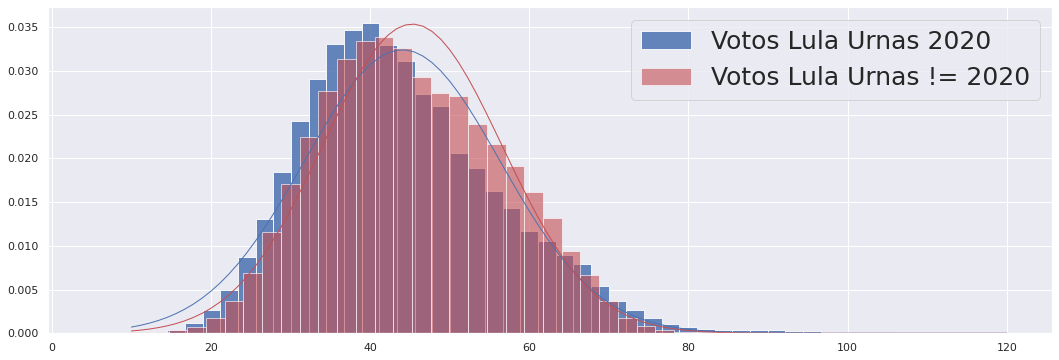

In [27]:
plt.figure(figsize=(18,6))
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('legend', fontsize=25)    # fontsize of the x and y labels
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
perc_lula = 100*urnas_presidente_br.query('MODELO == 2020').LULA/urnas_presidente_br.query('MODELO == 2020').VOTANTES
perc_lula.hist(bins=40, alpha=0.85, label='Votos Lula Urnas 2020', density=True)
mu, std = plot_pdf(perc_lula.mean(), perc_lula.std(), 'b')
print(f"mean {mu:.2f} std {std:.3f}")
perc_lula = 100*urnas_presidente_br.query('MODELO != 2020').LULA/urnas_presidente_br.query('MODELO != 2020').VOTANTES
perc_lula.hist(bins=40, color='r', alpha=0.6, label='Votos Lula Urnas != 2020', density=True)
mu, std  = plot_pdf(perc_lula.mean(), perc_lula.std(), 'r')
print(f"mean {mu:.2f} std {std:.3f}")
plt.legend()

### Urnas coexistentes cidade de SÃO PAULO mesmo local de votação (NR_LOCAL_VOTACAO) 

NR_LOCAL_VOTACAO é único somente dentro de cada NR_ZONA

In [55]:
def coexistent(x):
    return 2020 in x.values and x.nunique() > 1
locais = urnas_presidente.groupby(['SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_LOCAL_VOTACAO']).agg({'MODELO' : coexistent }).query("MODELO == True").index.to_list()
urnas_presidente_locais = urnas_presidente.loc[urnas_presidente.loc[:, ['SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_LOCAL_VOTACAO']].apply(tuple, axis=1).isin(locais)]
urnas_presidente_sp_city = urnas_presidente_locais.query("NM_MUNICIPIO == 'SÃO PAULO'")

Still a little bit weird... mas com certeza é o critérios idade e de escolaridade da distribuição das urnas.  
Análise mais completa do Tony Lampada abaixo:  
https://github.com/tonylampada/eleicoes22/tree/main/segundoturno

=2020 mean 52.89 std 8.785
<2020 mean 54.70 std 6.302


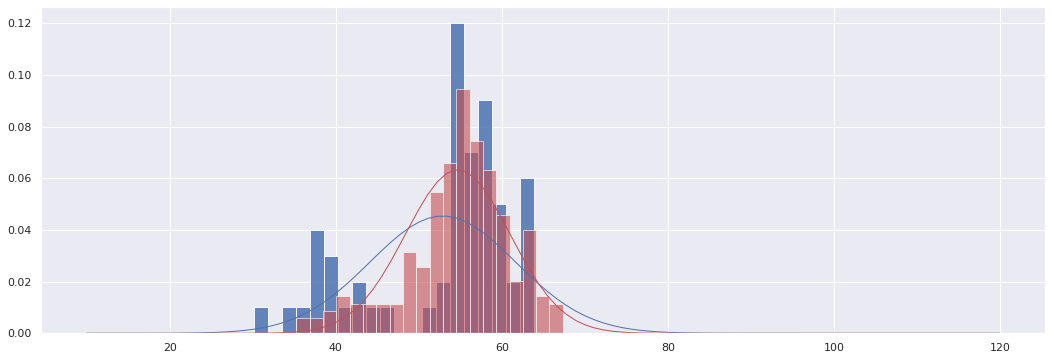

In [59]:
plt.figure(figsize=(18,6))
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('legend', fontsize=25)    # fontsize of the x and y labels
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
perc_lula = 100*urnas_presidente_sp_city.query('MODELO == 2020').LULA/urnas_presidente_sp_city.query('MODELO == 2020').VOTANTES
perc_lula.hist(bins=20, alpha=0.85, label='Votos Lula Urnas 2020', density=True)
mu, std = plot_pdf(perc_lula.mean(), perc_lula.std(), 'b')
print(f"=2020 mean {mu:.2f} std {std:.3f}")
perc_lula = 100*urnas_presidente_sp_city.query('MODELO != 2020').LULA/urnas_presidente_sp_city.query('MODELO != 2020').VOTANTES
perc_lula.hist(bins=20, color='r', alpha=0.6, label='Votos Lula Urnas != 2020', density=True)
mu, std  = plot_pdf(perc_lula.mean(), perc_lula.std(), 'r')
print(f"<2020 mean {mu:.2f} std {std:.3f}")